In [415]:
import pandas as pd
import numpy as np
import re
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [382]:
data = pd.read_csv("data_1.csv")

In [388]:
import json

In [393]:
#def extract_country(json_string):
    # Преобразование строки JSON в список Python
    country_list = json.loads(json_string)
    # Проверка на []
    if len(country_list) > 0:
        # Извлечение названия страны из первого элемента списка
        country_dict = country_list[0]
        country_name = country_dict['rating']
        return country_name
    else:
        return []

In [386]:
def extract_names(json_string):
    new_list = json.loads(json_string)  # преобразование строки JSON в список Python
    # проверка наличия элементов в списке
    if len(new_list) > 0:
        list_of_dicts=[]
        # извлечение необходимых названий из всех словарей списка
        for i in range(len(new_list)):
          list_of_dicts.append(new_list[i])
          list_of_names = [country_dict['ratings'] for country_dict in list_of_dicts]
        return list_of_names
    else:
        return []

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [167]:
data[data.duplicated ()].info() #проверим на наличие дубликатов

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 25418 to 371886
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        49 non-null     object
 1   private pool  0 non-null      object
 2   propertyType  50 non-null     object
 3   street        50 non-null     object
 4   baths         20 non-null     object
 5   homeFacts     50 non-null     object
 6   fireplace     3 non-null      object
 7   city          50 non-null     object
 8   schools       50 non-null     object
 9   sqft          23 non-null     object
 10  zipcode       50 non-null     object
 11  beds          22 non-null     object
 12  state         50 non-null     object
 13  stories       8 non-null      object
 14  mls-id        0 non-null      object
 15  PrivatePool   1 non-null      object
 16  MlsId         39 non-null     object
 17  target        49 non-null     object
dtypes: object(18)
memory usage: 7.4+ KB


In [168]:
data.drop_duplicates () #удалим дубликаты

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...","4,017",33180,5,FL,0.0,NaN,Yes,A10702700,"$1,249,000"
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...","2,000 sqft",60657,3 Beds,IL,9.0,NaN,NaN,10374233,"$674,999"
377182,for sale,NaN,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...","1,152 sqft",11434,3 Beds,NY,2,NaN,NaN,NaN,"$528,000"
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028,"8,479 sqft",TX,NaN,NaN,NaN,NaN,"$34,500"


In [169]:
data = data[~data['target'].isna()]
 #оставим строки, в которых нет стоимости , с ними работать нет смысла. 

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374704 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        335447 non-null  object
 1   private pool  4151 non-null    object
 2   propertyType  340150 non-null  object
 3   street        374702 non-null  object
 4   baths         269328 non-null  object
 5   homeFacts     374704 non-null  object
 6   fireplace     102521 non-null  object
 7   city          374670 non-null  object
 8   schools       374704 non-null  object
 9   sqft          334582 non-null  object
 10  zipcode       374704 non-null  object
 11  beds          283748 non-null  object
 12  state         374704 non-null  object
 13  stories       224909 non-null  object
 14  mls-id        24937 non-null   object
 15  PrivatePool   40121 non-null   object
 16  MlsId         310226 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usage: 5

Все обьеты типа object, есть пропуски в данных. 377185 строк, 18 признаков. 

In [171]:
data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [172]:
data.describe(include = object)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,335447,4151,340150,374702,269328,374704,102521,374670,374704,334582,374704,283748,374704,224909,24937,40121,310226,374704
unique,156,1,1279,334751,226,318850,1652,2019,295362,25373,4541,1147,39,347,24902,2,232876,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No,yes,NO MLS,"$225,000"
freq,156100,4151,91376,672,52080,7142,50018,24407,4177,11853,2139,53077,114667,66808,3,28687,24,1462


In [173]:
data.isnull().sum() #проверим данные на пропуски

status           39257
private pool    370553
propertyType     34554
street               2
baths           105376
homeFacts            0
fireplace       272183
city                34
schools              0
sqft             40122
zipcode              0
beds             90956
state                0
stories         149795
mls-id          349767
PrivatePool     334583
MlsId            64478
target               0
dtype: int64

In [174]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

private pool    98.892192
mls-id          93.344880
PrivatePool     89.292615
fireplace       72.639470
stories         39.976888
baths           28.122465
beds            24.274094
MlsId           17.207716
sqft            10.707652
status          10.476803
propertyType     9.221679
city             0.009074
street           0.000534
dtype: float64

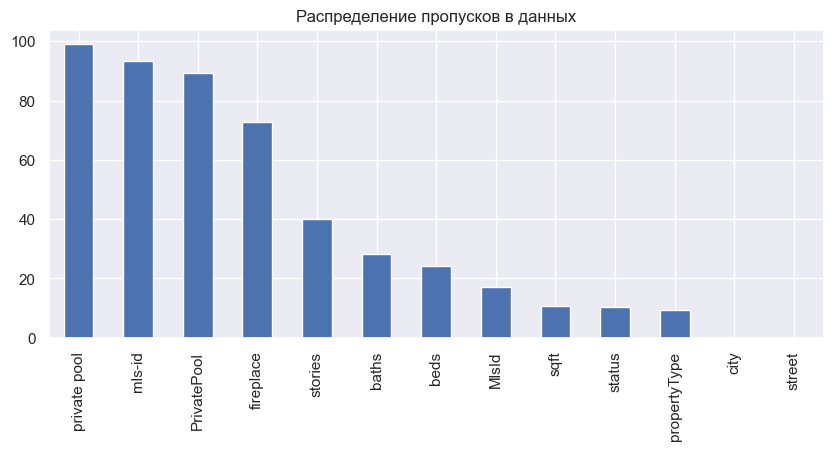

In [175]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

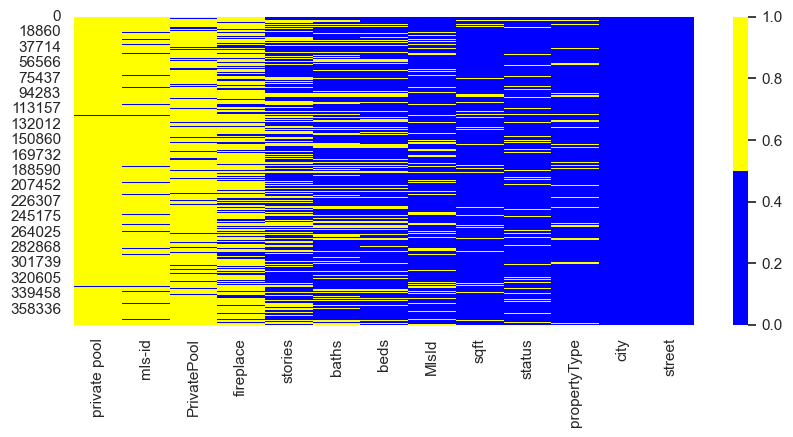

In [176]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
) #тепловая карта пропусков

Больше всего пропусков в признаках : private pool, mls-id, PrivatePool, fireplace.

Обработаем  пропуски  по правилам :

In [177]:
#создаем копию исходной таблицы
drop_data = data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

status          0.0
propertyType    0.0
street          0.0
baths           0.0
homeFacts       0.0
city            0.0
schools         0.0
sqft            0.0
zipcode         0.0
beds            0.0
state           0.0
MlsId           0.0
target          0.0
dtype: float64

In [178]:
print(drop_data.shape)

(170049, 13)


Удалили слишком много значений, попробуем заполнить пропуски и не удалять.

Обработаем признак PrivatePool.

In [179]:
data['PrivatePool'].nunique()

2

In [180]:
data.PrivatePool

0         NaN
1         NaN
2         yes
3         NaN
4         NaN
         ... 
377180    Yes
377181    NaN
377182    NaN
377183    NaN
377184    NaN
Name: PrivatePool, Length: 374704, dtype: object

In [181]:
data.PrivatePool = data.PrivatePool.replace(np.nan, 0)
data.PrivatePool = data.PrivatePool.replace('yes', 1)
data.PrivatePool = data.PrivatePool.replace('Yes', 1)

In [182]:
data.PrivatePool.info()

<class 'pandas.core.series.Series'>
Index: 374704 entries, 0 to 377184
Series name: PrivatePool
Non-Null Count   Dtype
--------------   -----
374704 non-null  int64
dtypes: int64(1)
memory usage: 5.7 MB


In [183]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

private pool    98.892192
mls-id          93.344880
fireplace       72.639470
stories         39.976888
baths           28.122465
beds            24.274094
MlsId           17.207716
sqft            10.707652
status          10.476803
propertyType     9.221679
city             0.009074
street           0.000534
dtype: float64

Пропусков в Признаке PrivatePool нет. Удаляем дублирующий признак private pool.

In [184]:
data = data.drop(['private pool'], axis = 1)

In [185]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

mls-id          93.344880
fireplace       72.639470
stories         39.976888
baths           28.122465
beds            24.274094
MlsId           17.207716
sqft            10.707652
status          10.476803
propertyType     9.221679
city             0.009074
street           0.000534
dtype: float64

In [186]:
data.head()

,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,0,611019,"$418,000"
1,for sale,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,0,201916904,"$310,000"
2,for sale,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,1,FR19221027,"$2,895,000"
3,for sale,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,0,14191809,"$2,395,000"
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,0,861745,"$5,000"


Обработаем признак status.

In [187]:
data['status'].nunique()

156

In [188]:
data.status.value_counts()

status
for sale                   156100
Active                     105206
For sale                    43465
foreclosure                  5677
New construction             5459
                            ...  
Coming soon: Nov 8.             1
Coming soon: Oct 29.            1
Coming soon: Dec 15.            1
Pending W/Backup Wanted         1
Coming soon: Dec 23.            1
Name: count, Length: 156, dtype: int64

In [189]:
data['status'].value_counts().sort_values(ascending = False)

status
for sale                                156100
Active                                  105206
For sale                                 43465
foreclosure                               5677
New construction                          5459
                                         ...  
Under Contract Taking Back Up Offers         1
Coming soon: Nov 5.                          1
Coming soon: Oct 21.                         1
Contingent   No Show                         1
Coming soon: Dec 23.                         1
Name: count, Length: 156, dtype: int64

In [190]:
data['status']

0           Active
1         for sale
2         for sale
3         for sale
4         for sale
            ...   
377180         NaN
377181    for sale
377182    for sale
377183         NaN
377184         NaN
Name: status, Length: 374704, dtype: object

In [191]:
data.status.value_counts().count()

156

In [192]:
data['status'].value_counts().sort_values(ascending=False).index[0] # найдем самый часто встречающийся

'for sale'

In [193]:

frequent_val=data['status'].mode()[0] #заменим пропуски на самый частый
data['status']=data['status'].fillna(frequent_val)
data['status'] = data['status'].replace('For sale', 'for sale') #заменим дублирующий признак
data.status.value_counts().count()

155

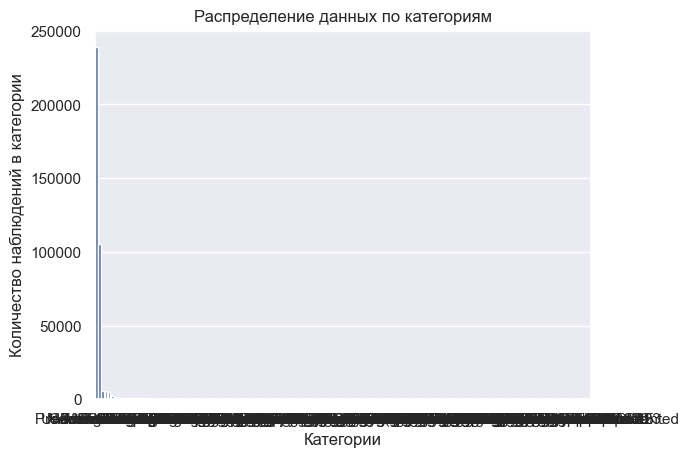

In [194]:
status_counts = data.status.value_counts()
sns.barplot(x = status_counts.index, y = status_counts.values)
plt.title('Распределение данных по категориям')
plt.ylabel('Количество наблюдений в категории')
plt.xlabel('Категории');

Максимальное количество обьектов for sale. 

In [195]:
data['status'].value_counts().sort_values(ascending = False)

status
for sale                                238822
Active                                  105206
foreclosure                               5677
New construction                          5459
Pending                                   4697
                                         ...  
Under Contract Taking Back Up Offers         1
Coming soon: Nov 5.                          1
Coming soon: Oct 21.                         1
Contingent   No Show                         1
Coming soon: Dec 23.                         1
Name: count, Length: 155, dtype: int64

In [196]:
ord_enc = OrdinalEncoder() #закодируем признак

data['status'] = ord_enc.fit_transform(data[['status']])
data['status'].head(10)

0      4.0
1    152.0
2    152.0
3    152.0
4    152.0
5    152.0
6      4.0
7      4.0
8      4.0
9    152.0
Name: status, dtype: float64

Обработаем признак propetyType.

In [197]:
data['propertyType'].nunique() #количество уникальных значений

1279

In [198]:
data['propertyType'] = data['propertyType'].replace('Single Family', 'single-family home') #переименуем дублирующие названия 
data['propertyType'] = data['propertyType'].replace('Single Family Home', 'single-family home')

In [199]:
data['propertyType'] = data['propertyType'].replace('Condo', 'condo')

In [200]:
data['propertyType'] = data['propertyType'].replace('Multi Family', 'multi-family')
data['propertyType'] = data['propertyType'].replace('Multi-Family Home', 'multi-family')

In [201]:
data['propertyType'] = data['propertyType'].replace('Townhouse', 'townhouse')

В признаке propertyType 9% пропусков , это примерно 34 тыс обьектов, заполнять самым часто встречающимся - может привести к ошибке прогнозирования цены, пометим их как unknown.

In [202]:
data['propertyType']=data['propertyType'].fillna('unknown')

In [203]:
data['propertyType'].value_counts().sort_values(ascending = False).head(30)

propertyType
single-family home               184989
condo                             42372
unknown                           34584
lot/land                          20532
townhouse                         18352
multi-family                      12147
Land                              10933
Condo/Townhome/Row Home/Co-Op      7701
Traditional                        5912
coop                               3265
High Rise                          1823
Ranch                              1781
Detached, One Story                1614
mobile/manufactured                1613
Single Detached, Traditional       1581
Contemporary                       1556
1 Story                            1234
Colonial                           1204
Mobile / Manufactured              1056
Contemporary/Modern                1000
2 Stories                           911
Mfd/Mobile Home                     791
Single Detached                     751
Detached, Two Story                 638
One Story                  

In [204]:
data.propertyType.isnull().mean() * 100 

0.0

In [205]:
ord_enc = OrdinalEncoder() #закодируем признак

data['propertyType'] = ord_enc.fit_transform(data[['propertyType']])
data['propertyType'].head(10)

0    1270.0
1    1270.0
2    1270.0
3    1270.0
4    1267.0
5    1271.0
6     767.0
7    1272.0
8    1270.0
9    1270.0
Name: propertyType, dtype: float64

Обработаем признак MlsId

In [206]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

mls-id       93.344880
fireplace    72.639470
stories      39.976888
baths        28.122465
beds         24.274094
MlsId        17.207716
sqft         10.707652
city          0.009074
street        0.000534
dtype: float64

In [207]:
data = data.drop(['mls-id'], axis=1) 

In [208]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

fireplace    72.639470
stories      39.976888
baths        28.122465
beds         24.274094
MlsId        17.207716
sqft         10.707652
city          0.009074
street        0.000534
dtype: float64

In [209]:
data['MlsId'].nunique()

232876

In [210]:
data['MlsId'].value_counts().sort_values(ascending = False).head(30)

MlsId
NO MLS                        24
No MLS #                      16
 A, Houston, TX 77008         13
 12A, Orlando, FL 32833       11
No                             9
 B, Houston, TX 77008          9
 1, South Boston, MA 02127     9
 B, Houston, TX 77007          8
No mls                         8
 11A, Orlando, FL 32833        8
 2, Washington, DC 20002       8
 2, Washington, DC 20010       7
 1, Washington, DC 20002       7
 2, Washington, DC 20009       6
 3A, Orlando, FL 32833         6
2088662                        6
 A, Austin, TX 78704           6
2101941                        6
 2, Washington, DC 20001       6
 1, Washington, DC 20010       6
 1, Washington, DC 20001       6
 2, Boston, MA 02129           6
 1A, Orlando, FL 32833         6
No MLS                         6
1412350                        6
NOMLSID                        6
 0, Doral, FL 33178            6
 A, Austin, TX 78721           6
10271270                       5
 A, Austin, TX 78702           5
Name

Думаю, признак MlsId для нас неинформативен. Служба множественного листинга (MLS) — это база данных, созданная сотрудничающими брокерами по недвижимости для предоставления данных о недвижимости для продажи. MLS позволяет брокерам просматривать списки недвижимости для продажи друг у друга с целью установления связи между покупателями жилья и продавцами.

In [211]:
data = data.drop(['MlsId'], axis=1)

Обработаем признак firepace.

In [212]:
data['fireplace'].value_counts().sort_values(ascending = False).head(30)

fireplace
yes                          50018
Yes                          20619
1                            14533
2                             2432
Not Applicable                1990
Fireplace                      847
3                              563
Living Room                    433
LOCATION                       399
Wood Burning                   311
Gas/Gas Logs                   300
No                             289
Fireplace YN                   287
Special Features               279
1 Fireplace                    274
0                              270
FAMILYRM                       246
Fireplace Features             239
Great Room                     207
Wood                           206
Gas Logs, Great Room           188
Ceiling Fan                    186
Living Room, Wood Burning      185
4                              184
Family Room, Wood Burning      149
FAMILYRM, Gas Logs             146
Gas                            134
Gas Logs, In Great Room        112
Gas Logs  

In [213]:
data['fireplace'] = data['fireplace'].replace('yes', 'Yes') #заменим одинаковые значения
data['fireplace'] = data['fireplace'].replace('Fireplace', 'Yes')
data['fireplace'] = data['fireplace'].replace('1 Fireplace', '1')
data['fireplace'] = data['fireplace'].replace('0', 'No')

In [214]:
popular_stypes =data['fireplace'].value_counts().nlargest(20).index
print(popular_stypes)

Index(['Yes', '1', '2', 'Not Applicable', '3', 'No', 'Living Room', 'LOCATION',
       'Wood Burning', 'Gas/Gas Logs', 'Fireplace YN', 'Special Features',
       'FAMILYRM', 'Fireplace Features', 'Great Room', 'Wood',
       'Gas Logs, Great Room', 'Ceiling Fan', 'Living Room, Wood Burning',
       '4'],
      dtype='object', name='fireplace')


In [215]:
data['fireplace'] =data['fireplace'].apply(lambda x: x if x in popular_stypes else 'other')
display(data['fireplace'])

0                  other
1                  other
2                    Yes
3                    Yes
4                  other
               ...      
377180             other
377181             other
377182             other
377183             other
377184    Not Applicable
Name: fireplace, Length: 374704, dtype: object

In [216]:
print(data['fireplace'].nunique())

21


In [217]:
ord_enc = OrdinalEncoder() #закодируем признак

data['fireplace'] = ord_enc.fit_transform(data[['fireplace']])
data['fireplace'].head(10)

0    20.0
1    20.0
2    19.0
3    19.0
4    20.0
5    20.0
6    20.0
7    20.0
8    20.0
9    20.0
Name: fireplace, dtype: float64

Обработаем признак beds.

In [218]:
data['beds'].nunique()

1147

In [219]:
data['beds'].head(50)

0          4
1     3 Beds
2     3 Beds
3     5 Beds
4        NaN
5     2 Beds
6        NaN
7        NaN
8          3
9          3
10    3 Beds
11       NaN
12    4 Beds
13      3 bd
14         4
15       NaN
16     Baths
17       NaN
18    4 Beds
19    4 Beds
20      4 bd
21      5 bd
22     Baths
23    4 Beds
24    4 Beds
25    8 Beds
26     Baths
27    3 Beds
28    4 Beds
29    2 Beds
30         4
31      4 bd
32    3 Beds
33         2
34    3 Beds
35    2 Beds
36         3
37         3
38      2 bd
39    2 Beds
40       NaN
41       NaN
42       NaN
43    3 Beds
44    2 Beds
45         3
46      5 bd
47    3 Beds
48       NaN
49       NaN
Name: beds, dtype: object

In [220]:

data['beds'] = data['beds'].replace(
    ['4 Beds', '3 Beds', '2 Beds', '5 Beds', '3 bd', '4 bd','5 bd', 'Baths', '3.0','4.0','2 bd','6 Beds', '2.0', '7 Beds', ' 1 bd', ' 6 bd', '8 Beds', '5.0', '1 bd', '6 bd', '1.0','6.0','9 Beds', '10 Beds','-- bd', 'Bath', ' ', '8 bd', '0.0', '7 bd', '7.0', '8.0', '12 Beds'],
    ['4','3','2','5','3','4','5','1','3','4','2', '6', '2', '7', '1', '6', '8', '5','1', '6', '1','6','9','10', '1','1', '1', '8', '0', '7','7','8', '12'])
#очень много повторяющихся значений

In [221]:
data.beds.head()

0      4
1      3
2      3
3      5
4    NaN
Name: beds, dtype: object

In [222]:
data['beds'].fillna('1')

0                  4
1                  3
2                  3
3                  5
4                  1
             ...    
377180             5
377181             3
377182             3
377183    8,479 sqft
377184             3
Name: beds, Length: 374704, dtype: object

In [223]:
popular_stypes =data['beds'].value_counts().nlargest(12).astype(int)
print(popular_stypes)

beds
3     105031
4      68564
2      49789
1      23270
5      21610
6       6537
7       1820
0       1431
8       1205
9        439
10       241
12       164
Name: count, dtype: int32


In [224]:
data['beds'] =data['beds'].apply(lambda x: x if x in popular_stypes else '12').astype(int)
display(data['beds'])

0          4
1          3
2          3
3          5
4         12
          ..
377180     5
377181     3
377182     3
377183    12
377184     3
Name: beds, Length: 374704, dtype: int32

In [225]:
data['beds'].value_counts().nlargest(30)

beds
3     105031
12     94767
4      68564
2      49789
1      23270
5      21610
6       6537
7       1820
0       1431
8       1205
9        439
10       241
Name: count, dtype: int64

In [226]:
data['beds'].astype(int)

0          4
1          3
2          3
3          5
4         12
          ..
377180     5
377181     3
377182     3
377183    12
377184     3
Name: beds, Length: 374704, dtype: int32

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374704 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        374704 non-null  float64
 1   propertyType  374704 non-null  float64
 2   street        374702 non-null  object 
 3   baths         269328 non-null  object 
 4   homeFacts     374704 non-null  object 
 5   fireplace     374704 non-null  float64
 6   city          374670 non-null  object 
 7   schools       374704 non-null  object 
 8   sqft          334582 non-null  object 
 9   zipcode       374704 non-null  object 
 10  beds          374704 non-null  int32  
 11  state         374704 non-null  object 
 12  stories       224909 non-null  object 
 13  PrivatePool   374704 non-null  int64  
 14  target        374704 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 44.3+ MB


In [228]:
data.describe() #проверим обработанные признаки

,status,propertyType,fireplace,beds,PrivatePool
count,374704.000000,374704.000000,374704.000000,374704.000000,374704.000000
mean,107.093802,1192.919817,18.739077,5.405371,0.107074
std,66.341454,222.421404,4.303949,3.989764,0.309208
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1265.000000,19.000000,3.000000,0.000000
50%,152.000000,1270.000000,20.000000,4.000000,0.000000
75%,152.000000,1270.000000,20.000000,12.000000,0.000000
max,154.000000,1272.000000,20.000000,12.000000,1.000000


Обработаем признак baths.

In [229]:
data['baths'].nunique()

226

In [230]:
data['baths'].fillna(0) #наверное ванны нет

0             3.5
1         3 Baths
2         2 Baths
3         8 Baths
4               0
           ...   
377180        6.0
377181    3 Baths
377182    3 Baths
377183          0
377184        2.0
Name: baths, Length: 374704, dtype: object

In [231]:
data["baths"] = data["baths"].str.replace(r"[^\d\.]", "", regex=True)

In [232]:
data.baths = data.baths.replace(np.nan, '0')

In [233]:
data['baths'].head(50)

0      3.5
1        3
2        2
3        8
4        0
5        0
6        0
7        0
8        2
9        3
10       2
11       0
12       3
13       2
14       3
15       0
16    1750
17       0
18       4
19       4
20       2
21       5
22    1000
23       4
24       2
25       7
26    1000
27       3
28       3
29       2
30       2
31       2
32       2
33     2.0
34       2
35       0
36     3.0
37       2
38       1
39       3
40       0
41       0
42       0
43       3
44       2
45       2
46       5
47       2
48       0
49       0
Name: baths, dtype: object

In [234]:
def is_num(str):
...     if str.replace('.', '').isdigit():
...         return True

In [235]:
def str_to_num(str):
...     if '.' in str and str.replace('.', '').isdigit():
...         return float(str)
...     elif str.isdigit():
...         return int(str)

In [236]:
data['baths'] = data['baths'].map(str_to_num)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374704 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        374704 non-null  float64
 1   propertyType  374704 non-null  float64
 2   street        374702 non-null  object 
 3   baths         373222 non-null  float64
 4   homeFacts     374704 non-null  object 
 5   fireplace     374704 non-null  float64
 6   city          374670 non-null  object 
 7   schools       374704 non-null  object 
 8   sqft          334582 non-null  object 
 9   zipcode       374704 non-null  object 
 10  beds          374704 non-null  int32  
 11  state         374704 non-null  object 
 12  stories       224909 non-null  object 
 13  PrivatePool   374704 non-null  int64  
 14  target        374704 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 44.3+ MB


In [238]:
data['baths'] = data['baths'].round(1)

In [239]:
data['baths'].head()

0    3.5
1    3.0
2    2.0
3    8.0
4    0.0
Name: baths, dtype: float64

In [240]:
display(data['baths'].describe()) 

count    3.732220e+05
mean     4.552582e+02
std      1.932218e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.161161e+08
Name: baths, dtype: float64

Проверим признак на выбросы.

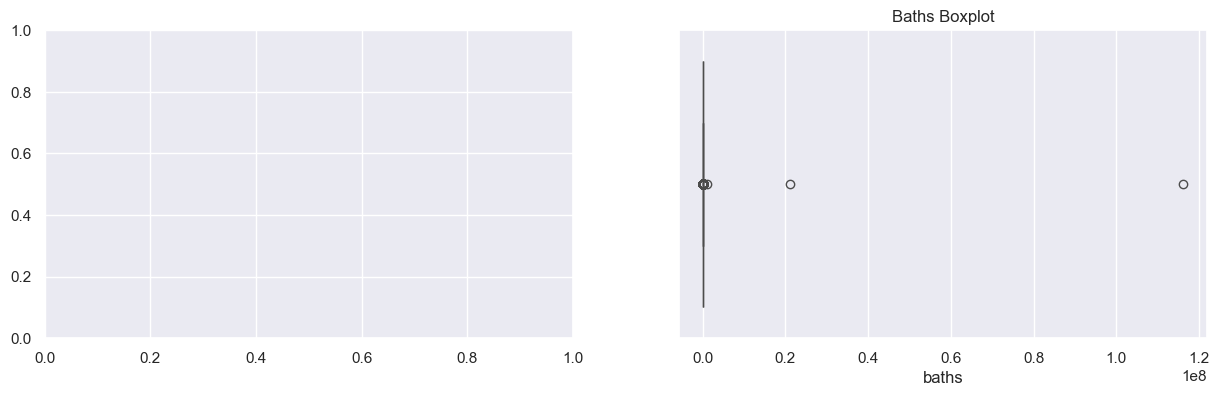

In [241]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=data, x='baths', ax=axes[0]);
#histplot.set_title('Baths Distribution');
boxplot = sns.boxplot(data=data, x='baths', ax=axes[1]);
boxplot.set_title('Baths Boxplot');

Наблюдаем в признаке Baths наличие выбросов .

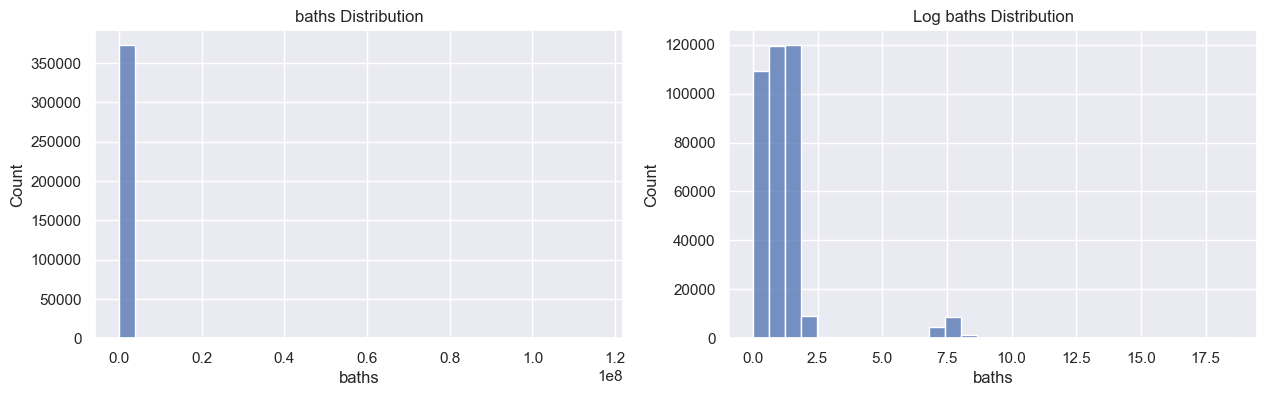

In [242]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(data['baths'], bins=30, ax=axes[0])
histplot.set_title('baths Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(data['baths'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log baths Distribution');

In [243]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [244]:
def outliers_iqr_mod(data, feature, left=1, right=6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [245]:
outliers, cleaned = outliers_iqr_mod(data, 'baths')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 14701
Результирующее число записей: 358517


Давайте реализуем алгоритм метода z-отклонения.

In [246]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [247]:
outliers, cleaned = outliers_z_score(data, 'baths', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 14617
Результирующее число записей: 358605


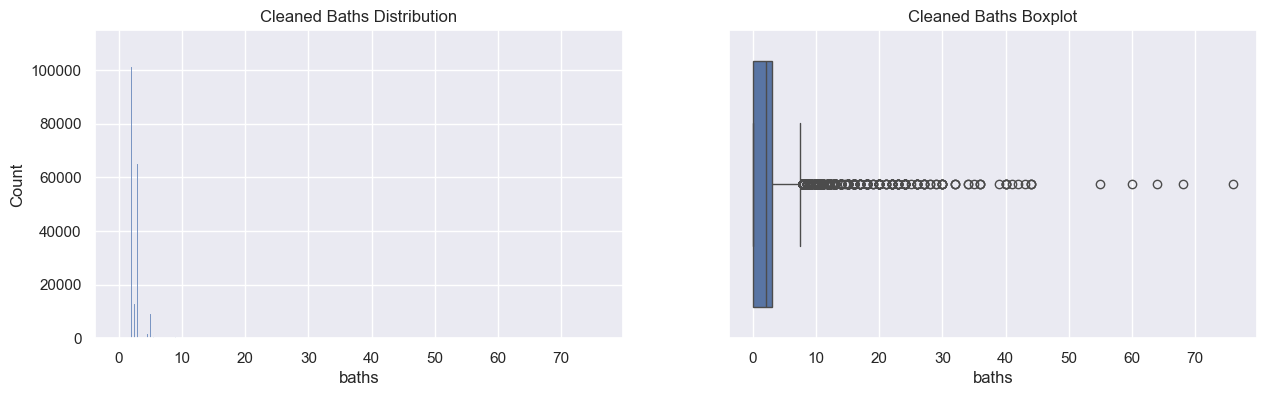

In [248]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='baths', ax=axes[0]);
histplot.set_title('Cleaned Baths Distribution');
boxplot = sns.boxplot(data=cleaned, x='baths', ax=axes[1]);
boxplot.set_title('Cleaned Baths Boxplot');

In [249]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358605 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        358605 non-null  float64
 1   propertyType  358605 non-null  float64
 2   street        358603 non-null  object 
 3   baths         358605 non-null  float64
 4   homeFacts     358605 non-null  object 
 5   fireplace     358605 non-null  float64
 6   city          358571 non-null  object 
 7   schools       358605 non-null  object 
 8   sqft          320180 non-null  object 
 9   zipcode       358605 non-null  object 
 10  beds          358605 non-null  int32  
 11  state         358605 non-null  object 
 12  stories       220579 non-null  object 
 13  PrivatePool   358605 non-null  int64  
 14  target        358605 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 42.4+ MB


In [250]:
outliers, cleaned_1 = outliers_z_score(cleaned, 'baths', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 200
Результирующее число записей: 358605


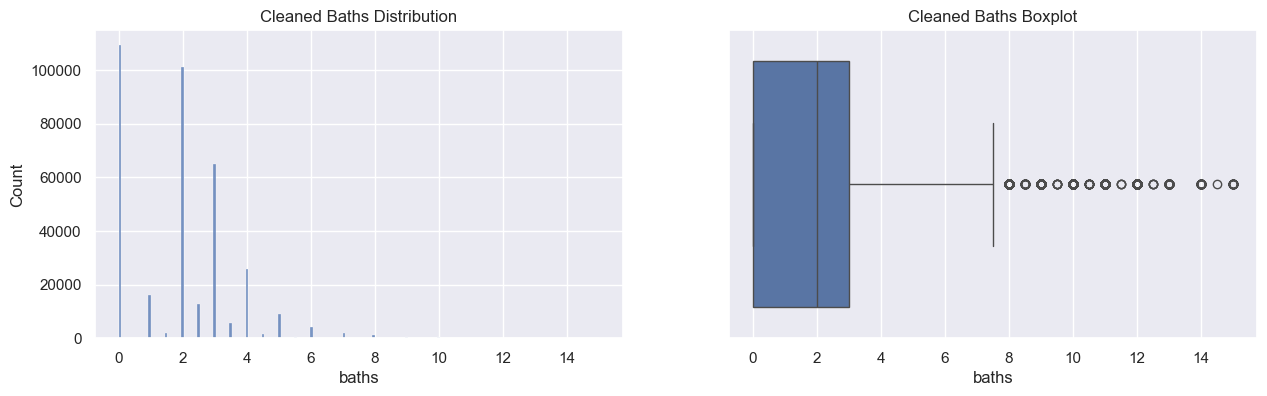

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_1, x='baths', ax=axes[0]);
histplot.set_title('Cleaned Baths Distribution');
boxplot = sns.boxplot(data=cleaned_1, x='baths', ax=axes[1]);
boxplot.set_title('Cleaned Baths Boxplot');

In [252]:
cols_null_percent = cleaned_1.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

stories    38.491651
sqft       10.720554
city        0.009486
street      0.000558
dtype: float64

In [253]:
cleaned_1['city'] = cleaned_1['city'].dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_10048\1218132639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_1['city'] = cleaned_1['city'].dropna()


In [254]:
cleaned_1['city'] = cleaned_1['city'].fillna(cleaned_1['city'].mode())

C:\Users\User\AppData\Local\Temp\ipykernel_10048\1015031973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_1['city'] = cleaned_1['city'].fillna(cleaned_1['city'].mode())


In [255]:
cols_null_percent = cleaned_1.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

stories    38.491651
sqft       10.720554
city        0.009486
street      0.000558
dtype: float64

In [256]:
data= cleaned_1.copy()

Закодируем признак city с помощью label encoding.

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358405 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        358405 non-null  float64
 1   propertyType  358405 non-null  float64
 2   street        358403 non-null  object 
 3   baths         358405 non-null  float64
 4   homeFacts     358405 non-null  object 
 5   fireplace     358405 non-null  float64
 6   city          358371 non-null  object 
 7   schools       358405 non-null  object 
 8   sqft          319982 non-null  object 
 9   zipcode       358405 non-null  object 
 10  beds          358405 non-null  int32  
 11  state         358405 non-null  object 
 12  stories       220449 non-null  object 
 13  PrivatePool   358405 non-null  int64  
 14  target        358405 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 42.4+ MB


In [258]:
data["city"].value_counts()

city
Houston           22798
Miami             14881
San Antonio       13790
Jacksonville       9348
Dallas             7634
                  ...  
Shasta                1
Sheepshead Bay        1
La Tuna Canyon        1
Gulf Hammock          1
Blue Springs          1
Name: count, Length: 1986, dtype: int64

In [259]:
data["city"] = data["city"].astype('category')

In [260]:
data.dtypes

status           float64
propertyType     float64
street            object
baths            float64
homeFacts         object
fireplace        float64
city            category
schools           object
sqft              object
zipcode           object
beds               int32
state             object
stories           object
PrivatePool        int64
target            object
dtype: object

In [261]:
data["city_cat"] = data["city"].cat.codes
data.head()

,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,target,city_cat
0,4.0,1270.0,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",20.0,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,0,"$418,000",1678
1,152.0,1270.0,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",20.0,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3,WA,2.0,0,"$310,000",1687
2,152.0,1270.0,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",19.0,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3,CA,1.0,1,"$2,895,000",1011
3,152.0,1270.0,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",19.0,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5,TX,3.0,0,"$2,395,000",422
4,152.0,1267.0,1524 Kiscoe St,0.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",20.0,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,12,FL,NaN,0,"$5,000",1319


In [262]:
data.dtypes

status           float64
propertyType     float64
street            object
baths            float64
homeFacts         object
fireplace        float64
city            category
schools           object
sqft              object
zipcode           object
beds               int32
state             object
stories           object
PrivatePool        int64
target            object
city_cat           int16
dtype: object

In [263]:
data = data.drop(['city'], axis = 1)

Обработаем признак street.

In [264]:
data['street']= data['street'].astype('category')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358405 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   status        358405 non-null  float64 
 1   propertyType  358405 non-null  float64 
 2   street        358403 non-null  category
 3   baths         358405 non-null  float64 
 4   homeFacts     358405 non-null  object  
 5   fireplace     358405 non-null  float64 
 6   schools       358405 non-null  object  
 7   sqft          319982 non-null  object  
 8   zipcode       358405 non-null  object  
 9   beds          358405 non-null  int32   
 10  state         358405 non-null  object  
 11  stories       220449 non-null  object  
 12  PrivatePool   358405 non-null  int64   
 13  target        358405 non-null  object  
 14  city_cat      358405 non-null  int16   
dtypes: category(1), float64(4), int16(1), int32(1), int64(1), object(7)
memory usage: 49.5+ MB


In [266]:
data['street'].nunique()

318758

In [267]:
data.street.value_counts()

street
Address Not Disclosed           671
Undisclosed Address             426
(undisclosed Address)           389
Address Not Available           175
2103 E State Hwy 21              57
                               ... 
225 N Judd St                     1
225 N Hibiscus Dr                 1
225 N Cove Blvd                   1
225 N Columbus Dr UNIT 7105       1
w dixie hwy NE 119 Th Terra       1
Name: count, Length: 318758, dtype: int64

In [268]:
data['street'] = data['street'].replace('Undisclosed Address', 'Address Not Disclosed')
data['street'] = data['street'].replace('(undisclosed Address)', 'Address Not Disclosed')
data['street'] = data['street'].replace('Address Not Available', 'Address Not Disclosed')

In [269]:
data['street'] = data['street'].astype('category').str[-3:] 

In [270]:
data['street'].value_counts()

street
 St    46474
 Dr    40065
Ave    32950
 Rd    19784
 Ln    16065
       ...  
#P5        1
8c         1
42K        1
19L        1
N14        1
Name: count, Length: 6192, dtype: int64

In [271]:
data['street'].nunique()

6192

In [272]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['street']= labelencoder.fit_transform(data['street'])
data['street']

0          461
1         3998
2          513
3         3998
4          525
          ... 
377180    3998
377181     711
377182    5567
377183     525
377184     371
Name: street, Length: 358405, dtype: int32

In [273]:
data.describe()

,status,propertyType,street,baths,fireplace,beds,PrivatePool,city_cat
count,358405.000000,358405.000000,358405.000000,358405.000000,358405.000000,358405.000000,358405.000000,358405.000000
mean,111.394545,1203.625586,2287.256129,1.933561,18.951532,5.594545,0.111865,967.705816
std,64.248146,202.678700,2054.673208,1.673516,3.823122,3.963328,0.315201,518.154513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.000000,1266.000000,498.000000,0.000000,19.000000,3.000000,0.000000,518.000000
50%,152.000000,1270.000000,1319.000000,2.000000,20.000000,4.000000,0.000000,951.000000
75%,152.000000,1270.000000,4149.000000,3.000000,20.000000,12.000000,0.000000,1365.000000
max,154.000000,1272.000000,6192.000000,15.000000,20.000000,12.000000,1.000000,1985.000000


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358405 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        358405 non-null  float64
 1   propertyType  358405 non-null  float64
 2   street        358405 non-null  int32  
 3   baths         358405 non-null  float64
 4   homeFacts     358405 non-null  object 
 5   fireplace     358405 non-null  float64
 6   schools       358405 non-null  object 
 7   sqft          319982 non-null  object 
 8   zipcode       358405 non-null  object 
 9   beds          358405 non-null  int32  
 10  state         358405 non-null  object 
 11  stories       220449 non-null  object 
 12  PrivatePool   358405 non-null  int64  
 13  target        358405 non-null  object 
 14  city_cat      358405 non-null  int16  
dtypes: float64(4), int16(1), int32(2), int64(1), object(7)
memory usage: 39.0+ MB


Обработаем признак sqft

In [275]:
def clean_currency(x):
    """ Если значение является строкой, то удаляет символ валюты и разделители, 
    в противном случае - значение является числовым и может быть преобразовано.
    """
    if isinstance(x, str):
        return(x.replace(',', '').replace(' ','').replace('Totalinteriorlivablearea:',''))

    return(x)

In [276]:
data['sqft'] = data['sqft'].apply(clean_currency)
data['sqft'].head(20)

0         2900
1     1947sqft
2     3000sqft
3     6457sqft
4          NaN
5      897sqft
6         1507
7          NaN
8         3588
9         1930
10    1300sqft
11        3130
12    2839sqft
13    1820sqft
14        2454
15         NaN
17        3325
18    3080sqft
19    1612sqft
20    1731sqft
Name: sqft, dtype: object

In [277]:

data = data.dropna(subset=['sqft'])


In [278]:
data['sqft'] = data['sqft'].astype('category').str[:4] 

In [279]:
data['sqft'].value_counts()

sqft
0       11853
1200     1399
1000     1034
1500      988
1800      962
        ...  
8787        1
7083        1
9490        1
438s        1
6193        1
Name: count, Length: 8559, dtype: int64

In [280]:
def clean_currency_1(x):
    """ Если значение является строкой, то удаляет символ валюты и разделители, 
    в противном случае - значение является числовым и может быть преобразовано.
    """
    if isinstance(x, str):
        return(x.replace('%','').replace('$','').replace('@','').replace('*','').replace('.','').replace('!','').replace('&','').replace('s', '').
               replace('-','').replace('q','').replace(" ''","").replace(',','').replace('+','').replace('/mo','').replace(' ',''))
   
    return(x)

In [281]:
data['sqft'] = data['sqft'].apply(clean_currency)

In [282]:
data['sqft'] = data['sqft'].replace ("/[^0-9\s]/","")

In [283]:
data['sqft'].head()

0    2900
1    1947
2    3000
3    6457
5    897s
Name: sqft, dtype: object

In [284]:
a = data['sqft'].apply(lambda x: x.isdigit())

In [285]:
a.head()

0     True
1     True
2     True
3     True
5    False
Name: sqft, dtype: bool

In [286]:
data = data[data['sqft'].apply(lambda x: x.isdigit())]

In [287]:
data['sqft'].info()

<class 'pandas.core.series.Series'>
Index: 298510 entries, 0 to 377184
Series name: sqft
Non-Null Count   Dtype 
--------------   ----- 
298510 non-null  object
dtypes: object(1)
memory usage: 4.6+ MB


In [288]:
data['sqft']= data['sqft'].astype('int')

In [289]:
cols_null_percent = data.isnull().mean() * 100 

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) #Умножаем на 100 %, находим столбцы, 
#где доля пропусков больше 0, сортируем по убыванию и выводим результат:

stories    31.117216
dtype: float64

Обработаем признак stories

In [290]:
data['stories'].head()

0    NaN
1    2.0
2    1.0
3    3.0
6    One
Name: stories, dtype: object

In [291]:
data['stories']  = data['stories'].replace(np.nan, '1' )
data['stories']  = data['stories'].replace('.','')
data['stories']  = data['stories'].replace('','')

In [292]:
data['stories'].head()

0      1
1    2.0
2    1.0
3    3.0
6    One
Name: stories, dtype: object

In [293]:
data = data[data['stories'].apply(lambda x: x.isdigit())]

In [294]:
data['stories'] = data['stories'].astype(int)

In [295]:
data.describe()

,status,propertyType,street,baths,fireplace,sqft,beds,stories,PrivatePool,city_cat
count,140232.000000,140232.000000,140232.000000,140232.000000,140232.000000,140232.000000,140232.00000,140232.000000,140232.000000,140232.000000
mean,86.832656,1141.836314,2533.770038,1.846639,18.320733,1977.618268,5.87592,1.276848,0.088910,978.277048
std,71.293832,266.829124,2080.316334,1.649761,5.238051,1320.769686,4.12999,1.755057,0.284615,510.313441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000
25%,4.000000,1214.000000,513.000000,0.000000,20.000000,1208.000000,3.00000,1.000000,0.000000,588.000000
50%,152.000000,1270.000000,1979.000000,2.000000,20.000000,1730.000000,4.00000,1.000000,0.000000,951.000000
75%,152.000000,1270.000000,4562.000000,3.000000,20.000000,2490.000000,12.00000,1.000000,0.000000,1392.000000
max,154.000000,1272.000000,6192.000000,15.000000,20.000000,9999.000000,12.00000,95.000000,1.000000,1984.000000


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140232 entries, 0 to 377182
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        140232 non-null  float64
 1   propertyType  140232 non-null  float64
 2   street        140232 non-null  int32  
 3   baths         140232 non-null  float64
 4   homeFacts     140232 non-null  object 
 5   fireplace     140232 non-null  float64
 6   schools       140232 non-null  object 
 7   sqft          140232 non-null  int32  
 8   zipcode       140232 non-null  object 
 9   beds          140232 non-null  int32  
 10  state         140232 non-null  object 
 11  stories       140232 non-null  int32  
 12  PrivatePool   140232 non-null  int64  
 13  target        140232 non-null  object 
 14  city_cat      140232 non-null  int16  
dtypes: float64(4), int16(1), int32(4), int64(1), object(5)
memory usage: 14.2+ MB


Пропусков данных больше нет. Посмотрим на остальные признкаи. 

Обработам признак state.

In [297]:
data['state'].head()

0     NC
8     IA
10    NY
11    TX
17    NY
Name: state, dtype: object

In [298]:
data['state'].nunique()

37

In [299]:
data['state'] = data['state'].astype('category').cat.codes



Обработаем признак zipcode

In [300]:
data.head()

,status,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,beds,state,stories,PrivatePool,target,city_cat
0,4.0,1270.0,461,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",20.0,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,20,1,0,"$418,000",1678
8,4.0,1270.0,3998,2.0,"{'atAGlanceFacts': [{'factValue': '1970', 'fac...",20.0,"[{'rating': ['2', '2', '4', '7', '4', 'NR'], '...",3588,50401,3,9,1,0,"$244,900",1057
10,152.0,1266.0,2877,2.0,"{'atAGlanceFacts': [{'factValue': '1965', 'fac...",20.0,"[{'rating': ['2/10', '8/10', '10/10'], 'data':...",1300,11354,3,23,1,0,"$669,000",588
11,4.0,728.0,4562,0.0,"{'atAGlanceFacts': [{'factValue': '2015', 'fac...",20.0,"[{'rating': ['6', '3', '6', '1', '5'], 'data':...",3130,77068,12,31,2,0,"260,000",795
17,4.0,1271.0,4812,0.0,"{'atAGlanceFacts': [{'factValue': '1899', 'fac...",20.0,"[{'rating': ['2', '5', '1', '2'], 'data': {'Di...",3325,10027,12,23,1,0,"2,650,000",1206


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140232 entries, 0 to 377182
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        140232 non-null  float64
 1   propertyType  140232 non-null  float64
 2   street        140232 non-null  int32  
 3   baths         140232 non-null  float64
 4   homeFacts     140232 non-null  object 
 5   fireplace     140232 non-null  float64
 6   schools       140232 non-null  object 
 7   sqft          140232 non-null  int32  
 8   zipcode       140232 non-null  object 
 9   beds          140232 non-null  int32  
 10  state         140232 non-null  int8   
 11  stories       140232 non-null  int32  
 12  PrivatePool   140232 non-null  int64  
 13  target        140232 non-null  object 
 14  city_cat      140232 non-null  int16  
dtypes: float64(4), int16(1), int32(4), int64(1), int8(1), object(4)
memory usage: 13.2+ MB


In [302]:
data['zipcode'].head()

0     28387
8     50401
10    11354
11    77068
17    10027
Name: zipcode, dtype: object

In [303]:
le = LabelEncoder()
le.fit(data['zipcode'])
data['zipcode']=le.transform(data['zipcode'])
data

,status,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,beds,state,stories,PrivatePool,target,city_cat
0,4.0,1270.0,461,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",20.0,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,893,4,20,1,0,"$418,000",1678
8,4.0,1270.0,3998,2.0,"{'atAGlanceFacts': [{'factValue': '1970', 'fac...",20.0,"[{'rating': ['2', '2', '4', '7', '4', 'NR'], '...",3588,2004,3,9,1,0,"$244,900",1057
10,152.0,1266.0,2877,2.0,"{'atAGlanceFacts': [{'factValue': '1965', 'fac...",20.0,"[{'rating': ['2/10', '8/10', '10/10'], 'data':...",1300,212,3,23,1,0,"$669,000",588
11,4.0,728.0,4562,0.0,"{'atAGlanceFacts': [{'factValue': '2015', 'fac...",20.0,"[{'rating': ['6', '3', '6', '1', '5'], 'data':...",3130,2491,12,31,2,0,"260,000",795
17,4.0,1271.0,4812,0.0,"{'atAGlanceFacts': [{'factValue': '1899', 'fac...",20.0,"[{'rating': ['2', '5', '1', '2'], 'data': {'Di...",3325,89,12,23,1,0,"2,650,000",1206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377168,152.0,1270.0,355,5.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",19.0,"[{'rating': ['3/10', '8/10', '4/10', '5/10', '...",5992,1375,4,6,1,1,"$2,495,000",173
377169,152.0,1270.0,4894,0.0,"{'atAGlanceFacts': [{'factValue': '1945', 'fac...",20.0,"[{'rating': ['6/10', '2/10', '4/10'], 'data': ...",1740,1099,3,6,1,0,"$110,000",634
377176,152.0,1270.0,498,2.0,"{'atAGlanceFacts': [{'factValue': '1962', 'fac...",19.0,"[{'rating': ['3/10', '1/10', '3/10'], 'data': ...",1829,1113,3,6,1,0,"$171,306",1293
377177,4.0,1147.0,6114,0.0,"{'atAGlanceFacts': [{'factValue': '1921', 'fac...",20.0,"[{'rating': ['4', '6', '5'], 'data': {'Distanc...",1895,2375,12,31,1,0,"199,900",607


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140232 entries, 0 to 377182
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        140232 non-null  float64
 1   propertyType  140232 non-null  float64
 2   street        140232 non-null  int32  
 3   baths         140232 non-null  float64
 4   homeFacts     140232 non-null  object 
 5   fireplace     140232 non-null  float64
 6   schools       140232 non-null  object 
 7   sqft          140232 non-null  int32  
 8   zipcode       140232 non-null  int32  
 9   beds          140232 non-null  int32  
 10  state         140232 non-null  int8   
 11  stories       140232 non-null  int32  
 12  PrivatePool   140232 non-null  int64  
 13  target        140232 non-null  object 
 14  city_cat      140232 non-null  int16  
dtypes: float64(4), int16(1), int32(5), int64(1), int8(1), object(3)
memory usage: 12.7+ MB


In [305]:
data['target'].head()

0      $418,000
8      $244,900
10     $669,000
11      260,000
17    2,650,000
Name: target, dtype: object

In [306]:
data['target'] = data['target'].apply(clean_currency_1)

In [307]:
data['target'].head()

0      418000
8      244900
10     669000
11     260000
17    2650000
Name: target, dtype: object

In [308]:
data['target'] = data['target'].astype(int)

In [309]:
data.describe()

,status,propertyType,street,baths,fireplace,sqft,zipcode,beds,state,stories,PrivatePool,target,city_cat
count,140232.000000,140232.000000,140232.000000,140232.000000,140232.000000,140232.000000,140232.000000,140232.00000,140232.000000,140232.000000,140232.000000,1.402320e+05,140232.000000
mean,86.832656,1141.836314,2533.770038,1.846639,18.320733,1977.618268,1799.206886,5.87592,15.646964,1.276848,0.088910,6.762257e+05,978.277048
std,71.293832,266.829124,2080.316334,1.649761,5.238051,1320.769686,1001.938605,4.12999,11.718906,1.755057,0.284615,1.769748e+06,510.313441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000e+00,-1.000000
25%,4.000000,1214.000000,513.000000,0.000000,20.000000,1208.000000,1158.000000,3.00000,6.000000,1.000000,0.000000,1.971085e+05,588.000000
50%,152.000000,1270.000000,1979.000000,2.000000,20.000000,1730.000000,1424.000000,4.00000,8.000000,1.000000,0.000000,3.349000e+05,951.000000
75%,152.000000,1270.000000,4562.000000,3.000000,20.000000,2490.000000,2527.000000,12.00000,30.000000,1.000000,0.000000,6.299000e+05,1392.000000
max,154.000000,1272.000000,6192.000000,15.000000,20.000000,9999.000000,3903.000000,12.00000,36.000000,95.000000,1.000000,1.150000e+08,1984.000000


In [320]:
df_new = data[['status', 'propertyType', 'street', 'baths', 
               'fireplace', 'sqft','zipcode', 'beds', 'state', 'stories', 'PrivatePool', 'target','city_cat']]

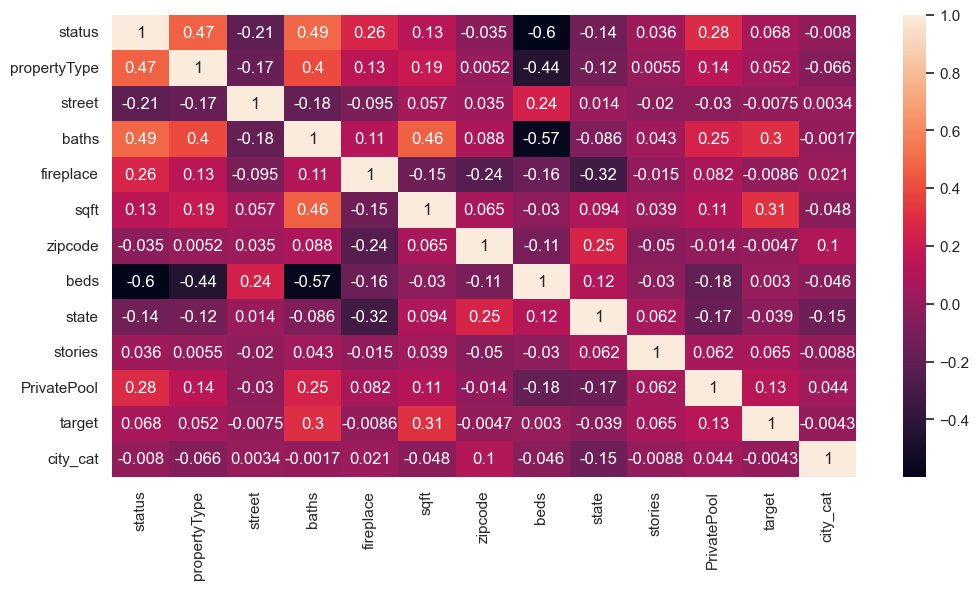

In [321]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(df_new.corr(), annot=True);

Сильной корреляции с признаком Target не наблюдается. 

In [322]:
y = df_new['target']
x = df_new.drop(columns='target')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [323]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 554800.308


Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 

In [326]:
types = df_new.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['status',
 'propertyType',
 'street',
 'baths',
 'fireplace',
 'sqft',
 'zipcode',
 'beds',
 'state',
 'stories',
 'PrivatePool',
 'target',
 'city_cat']

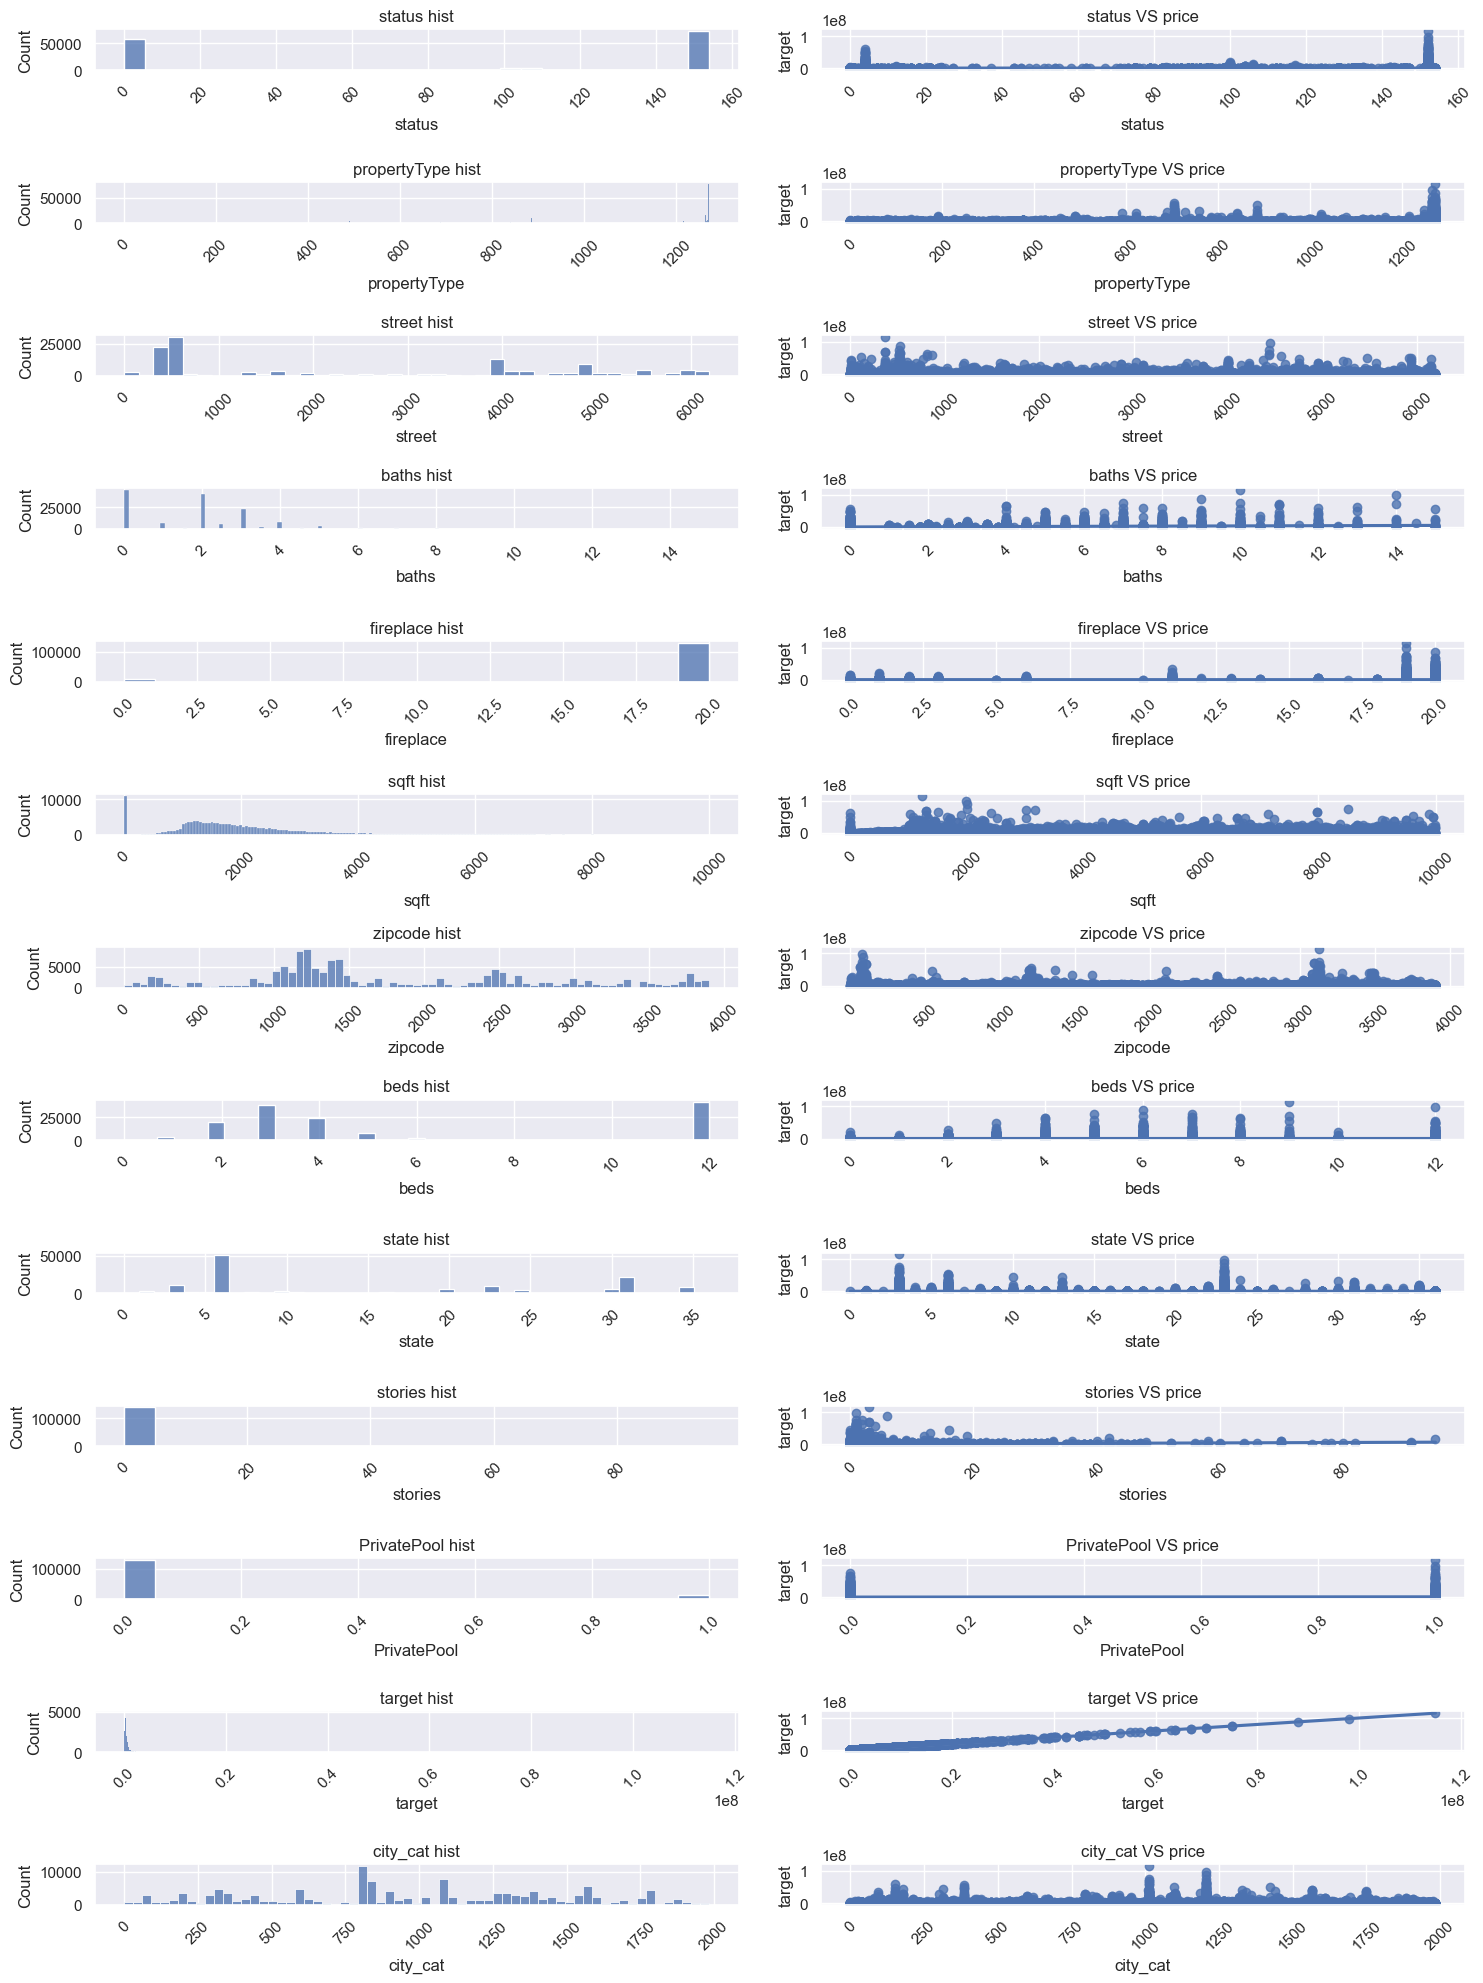

In [327]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=df_new, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=df_new, x=feature, y='target', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS target+++++++++++++++++++++++++++++++++++++++++++++++++++++'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [328]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [331]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.158
Train MAE: 555360.966
Train MAPE: 2010.286


Test R^2: 0.167
Test MAE: 554800.308
Train MAPE: 2989.097


In [334]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Инициализируем объект класса линейная регрессия
sgd_lr = linear_model.SGDRegressor(random_state=42)
#Обучаем модель - ищем параметры
sgd_lr.fit(X_train_scaled, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred = sgd_lr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.157
Train MAE: 543275.616
Train MAPE: 1845.088


Test R^2: 0.163
Test MAE: 542991.332
Train MAPE: 2783.288


Попробуем добавить в данные полиномиальные признаки и построить модель полиномиальной регрессии. Предварительно нормализуем данные:

In [335]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (98162, 90)
Test shape: (42070, 90)


In [338]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.063
Train MAE: 443214.594
Train MAPE: 1296.085


Test R^2: 0.026
Test MAE: 443768.212
Train MAPE: 1686.790


In [339]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (98162, 90)
Test shape: (42070, 90)


**Линейная регрессия с L2-регуляризацией**

In [340]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.184
Train MAE: 378708.862
Train MAPE: 883.227


Test R^2: 0.197
Test MAE: 379121.301
Train MAPE: 1229.037


**Подбор параметра регуляризации $\alpha$**

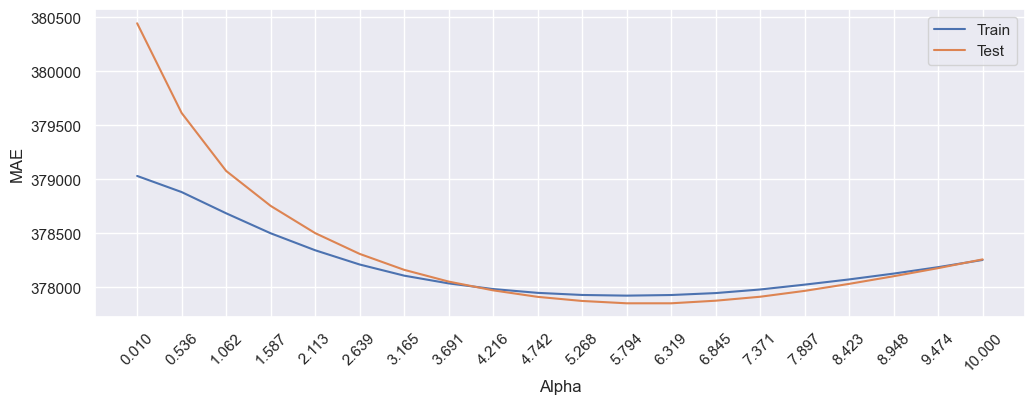

In [341]:
#Создаем список из 20 возможных значений от 0.001 до 10
alpha_list = np.linspace(0.01, 10, 20)
#Создаем пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаем объект класса линейная регрессия с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель предсказывать логарифм целевого признака
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    #Делаем предсказание для каждой из выборок
    #Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    #Рассчитываем метрику для двух выборок и добавляем их в списки
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))

#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('MAE') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Лучшее значение метрики находится в диапазоне от 5 до 6.

**Финальная модель**

In [342]:
#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=5.7)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.202
Train MAE: 377923.252
Train MAPE: 892.444


Test R^2: 0.237
Test MAE: 377854.067
Train MAPE: 1259.646


Метрики улучшилис, но незначительно ,работаем дальше.

Посмотрим на разброс ошибок нашей модели с помощью boxplot-диграммы. Это поможет нам понять, как много обьектов  в каждой из выборок, для которых мы допускаем высокую ошибку в предсказании цены.

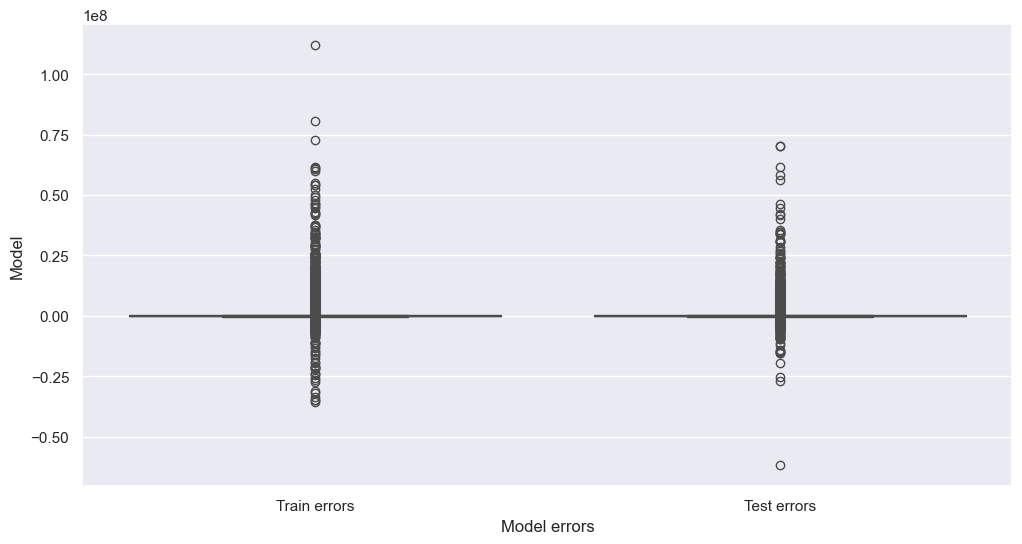

In [343]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Попробуем реализовать другие модели и улучшить качество предсказания. 

## Бэггинг: случайный лес. 

In [419]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train)
#Выводим результирующие метрики


DecisionTreeRegressor(max_depth=10, random_state=42)

In [420]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [407]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MAE для решающего дерева {round(metrics.mean_absolute_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по R2 для решающего дерева {round(metrics.r2_score(y_test, y_pred1),2)}')

print(f'Качество предсказания по MAE для случайного леса  {round(metrics.mean_absolute_error(y_test, y_pred2),2)}')
print(f'Качество предсказания по R2 для случайного леса  {round(metrics.r2_score(y_test, y_pred2),2)}')

Качество предсказания по MAE для решающего дерева 340731.63
Качество предсказания по R2 для решающего дерева 0.35
Качество предсказания по MAE для случайного леса  302695.72
Качество предсказания по R2 для случайного леса  0.61


Случайный лес показал наилучшие результаты предсказания. 

 ## Стекинг

Будем строить стекинг на следующих моделях:

'dt' — дерево решений;
'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
случайный лес с количеством деревьев, равным 10, в качестве метамодели.
Примечание. В данном случае мы рассматриваем RidgeCV, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу Leave-One-Out Cross-Validation. 

In [409]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [412]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MAE для стекинга {round(metrics.mean_absolute_error(y_test, y_pred_stack), 2)}')
print(f'Качество предсказания по R2 для стекинга {round(metrics.r2_score(y_test, y_pred_stack), 2)}')

Качество предсказания по MAE для стекинга 353815.42
Качество предсказания по R2 для стекинга 0.39


 ## Бустинг

In [414]:


# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    base_estimator=dt, #базовая модель
    n_estimators=10, #количество моделей в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MAE для AdaBoost {round(metrics.mean_absolute_error(y_test, ada_pred),2)}')
print(f'Качество предсказания по R2 для AdaBoost {round(metrics.r2_score(y_test, ada_pred),2)}')

d:\Skillfactory\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Качество предсказания по MAE для AdaBoost 830992.29
Качество предсказания по R2 для AdaBoost 0.21


In [418]:


# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MAE для GradientBoostingRegressor {round(metrics.mean_absolute_error(y_test, gb_pred),2)}')
print(f'Качество предсказания по R2 для GradientBoostingRegressor {round(metrics.r2_score(y_test, gb_pred),2)}')

Качество предсказания по MAE для GradientBoostingRegressor 475251.17
Качество предсказания по R2 для GradientBoostingRegressor 0.33


Наилучший результат получился у модели Случайный лес R2 = 0.61, подберем для нее гиперпараметры.

In [425]:
import optuna

d:\Skillfactory\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [429]:
random_state = 42

In [427]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model =RandomForestRegressor(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.r2_score(y_train, model.predict(X_train))

  return score

In [431]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestRegressor", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=5)

[I 2023-10-23 13:36:54,543] A new study created in memory with name: RandomForestRegressor
[I 2023-10-23 13:39:29,606] Trial 0 finished with value: 0.6614805797328651 and parameters: {'n_estimators': 138, 'max_depth': 21, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6614805797328651.
[I 2023-10-23 13:42:43,620] Trial 1 finished with value: 0.7323372884017194 and parameters: {'n_estimators': 156, 'max_depth': 22, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7323372884017194.
[I 2023-10-23 13:47:36,744] Trial 2 finished with value: 0.8559788703477551 and parameters: {'n_estimators': 170, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8559788703477551.
[I 2023-10-23 13:50:17,775] Trial 3 finished with value: 0.6494933907199238 and parameters: {'n_estimators': 152, 'max_depth': 20, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.8559788703477551.
[I 2023-10-23 13:52:13,742] Trial 4 finished with value: 0.6768148835580502 and parameters: {'n_

CPU times: total: 14min 54s
Wall time: 15min 19s


In [432]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("R2score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 170, 'max_depth': 30, 'min_samples_leaf': 2}
R2score на обучающем наборе: 0.86


In [435]:
# Создаем модель случайного леса c подобранными параметрами
regr3 = RandomForestRegressor(max_depth=30, n_estimators=170,min_samples_leaf=2,  random_state=42)
# Обучаем модель
regr3.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=170,
                      random_state=42)

In [436]:
y_pred3 = regr3.predict(X_test)

In [437]:
print(f'Качество предсказания по MAE для случайного леса  {round(metrics.mean_absolute_error(y_test, y_pred3),2)}')
print(f'Качество предсказания по R2 для случайного леса  {round(metrics.r2_score(y_test, y_pred3),2)}')

Качество предсказания по MAE для случайного леса  237962.32
Качество предсказания по R2 для случайного леса  0.67


Да, наилучший результат метрики R2 = 0.67 показал RandomForestRegressor с подобранными гиперпараметрами с помощью метода Optuna.